In [7]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
from matplotlib.patches import Rectangle
from tqdm import tqdm
import os
from random import shuffle
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout,MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 
from keras.optimizers import RMSprop

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
path_mask='D:\\covid-19 mask detection\\image\\mask_with_coodinate\\'
path_normal='D:\\covid-19 mask detection\\image\\normal_with_coodinate\\'

In [78]:
coodinate_mask=pd.read_csv('D:\\covid-19 mask detection\\image\\coodinate_file\\new_coodinate_mask.csv')
coodinate_normal=pd.read_csv('D:\\covid-19 mask detection\\image\\coodinate_file\\new_coodinate_normal.csv')

In [34]:
img=cv2.imread('D:\\covid-19 mask detection\\kh1.jpg')

In [18]:
img.shape

(720, 1280, 3)

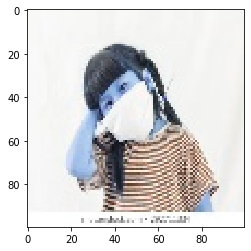

In [4]:
plt.imshow(img)
plt.

In [26]:
co=coodinate.loc[0,'region_shape_attributes']

In [28]:
co=json.loads(co)

In [33]:
x=co['x']
y=co['y']
w=co['width']
h=co['height']

In [31]:
co

{'name': 'rect', 'x': 23, 'y': 12, 'width': 48, 'height': 52}

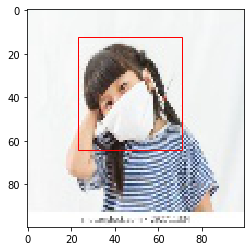

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('D:\\covid-19 mask detection\\image\\mask_with_coodinate\\[www.shutterstock.com][0]little-girl-standing-protective-mask-260nw-292711334.jpg'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [73]:
coodinate_mask.head()
co=coodinate.loc[0,'region_shape_attributes']
co=json.loads(co)
x=co['x']
y=co['y']
w=co['width']
h=co['height']

,Unnamed: 0,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0,[www.shutterstock.com][0]little-girl-standing-...,5406,{},1,0,"{""name"":""rect"",""x"":23,""y"":12,""width"":48,""heigh...",{}
1,1,[www.shutterstock.com][0]woman-wearing-face-ma...,4529,{},1,0,"{""name"":""rect"",""x"":12,""y"":9,""width"":35,""height...",{}
2,2,[www.shutterstock.com][1]woman-mask-outdoor-ai...,7070,{},1,0,"{""name"":""rect"",""x"":25,""y"":14,""width"":42,""heigh...",{}
3,3,[www.shutterstock.com][1]woman-wearing-hygiene...,4696,{},1,0,"{""name"":""rect"",""x"":46,""y"":13,""width"":37,""heigh...",{}
4,4,[www.shutterstock.com][3]air-pollution-city-wo...,5930,{},1,0,"{""name"":""rect"",""x"":25,""y"":9,""width"":47,""height...",{}


In [79]:
l=[]
index=0
for i in tqdm(os.listdir(path_mask)):
    path=path_mask+i
    img=np.array(Image.open(path))
    co=coodinate_mask.loc[index,'region_shape_attributes']
    co=json.loads(co)
    x=co['x']
    y=co['y']
    w=co['width']
    h=co['height']
    l.append([img,np.array([x,y,w,h])])
    index=index+1
    if index==100:
        break

  0%|                                                                                          | 0/201 [00:00<?, ?it/s]


In [81]:

index=0
for i in tqdm(os.listdir(path_normal)):
    path=path_normal+i
    img=np.array(Image.open(path))
    co=coodinate_normal.loc[index,'region_shape_attributes']
    co=json.loads(co)
    x=co['x']
    y=co['y']
    w=co['width']
    h=co['height']
    l.append([img,np.array([x,y,w,h])])
    index=index+1

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 173.77it/s]


In [82]:
l

[[array([[[245, 249, 248],
          [245, 249, 248],
          [245, 249, 248],
          ...,
          [243, 245, 242],
          [243, 245, 242],
          [243, 245, 242]],
  
         [[245, 249, 248],
          [245, 249, 248],
          [245, 249, 248],
          ...,
          [243, 245, 244],
          [243, 245, 244],
          [243, 245, 244]],
  
         [[245, 249, 248],
          [245, 249, 248],
          [247, 249, 248],
          ...,
          [244, 246, 245],
          [243, 245, 244],
          [243, 245, 244]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [84]:
coodinate_normal.tail()

,Unnamed: 0,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
95,95,[www.shutterstock.com][170]senior-lady-portrai...,5090,{},1,0,"{""name"":""rect"",""x"":2,""y"":1,""width"":59,""height""...",{}
96,96,[www.shutterstock.com][173]happy-cheerful-youn...,3923,{},1,0,"{""name"":""rect"",""x"":35,""y"":5,""width"":45,""height...",{}
97,97,[www.shutterstock.com][179]close-face-young-ma...,3906,{},1,0,"{""name"":""rect"",""x"":29,""y"":4,""width"":43,""height...",{}
98,98,[www.shutterstock.com][179]close-portrait-youn...,7146,{},1,0,"{""name"":""rect"",""x"":16,""y"":3,""width"":53,""height...",{}
99,99,[www.shutterstock.com][179]head-shoulders-shot...,4745,{},1,0,"{""name"":""rect"",""x"":14,""y"":1,""width"":53,""height...",{}


In [85]:
len(l)

200

In [223]:
x=[]
y=[]
for i,c in l:
    x.append(i)
    y.append(c)

In [155]:
x[:1]

array([[[[0.00326028, 0.00315263, 0.00290657],
         [0.00326028, 0.00326028, 0.00326028],
         [0.0031065 , 0.00330642, 0.00356786],
         ...,
         [0.0033218 , 0.00315263, 0.00287582],
         [0.00333718, 0.00316801, 0.00286044],
         [0.00330642, 0.00312188, 0.00275279]],

        [[0.00313725, 0.0030296 , 0.00275279],
         [0.00319877, 0.00319877, 0.00319877],
         [0.0031065 , 0.00330642, 0.00356786],
         ...,
         [0.00326028, 0.00307574, 0.00286044],
         [0.00322953, 0.00304498, 0.00279892],
         [0.00312188, 0.00292195, 0.00262976]],

        [[0.00306036, 0.00295271, 0.00266052],
         [0.00318339, 0.00318339, 0.00318339],
         [0.00312188, 0.0033218 , 0.00358324],
         ...,
         [0.00322953, 0.00304498, 0.00286044],
         [0.00319877, 0.00301423, 0.00279892],
         [0.0030296 , 0.00284506, 0.00262976]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [167]:
y[:5]

array([[0.0018, 0.0015, 0.0057, 0.0058],
       [0.0027, 0.0005, 0.004 , 0.0055],
       [0.0008, 0.0001, 0.0088, 0.0088],
       [0.0023, 0.0012, 0.0048, 0.0052],
       [0.0029, 0.0004, 0.0055, 0.0066]])

In [224]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)
x=x/255
y=y/100
print(x.shape)
print(y.shape)

(200, 100, 100, 3)
(200, 4)
(200, 100, 100, 3)
(200, 4)


In [222]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [229]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPool2D(2))
#model.add(Conv2D(512,(3,3),activation='relu'))
#model.add(Conv2D(512,(3,3),activation='relu'))
#model.add(Conv2D(512,(3,3),activation='relu'))
#model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(4,activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [230]:
model.fit(x,y,batch_size=10,epochs=10,callbacks=[EarlyStopping(patience=10)])

Epoch 1/10
200/200 [==============================] - ETA: 1:32 - loss: 0.071 - ETA: 53s - loss: 0.079 - ETA: 39s - loss: 0.09 - ETA: 31s - loss: 0.07 - ETA: 26s - loss: 0.07 - ETA: 23s - loss: 0.07 - ETA: 20s - loss: 0.07 - ETA: 18s - loss: 0.06 - ETA: 16s - loss: 0.06 - ETA: 14s - loss: 0.05 - ETA: 12s - loss: 0.05 - ETA: 11s - loss: 0.04 - ETA: 9s - loss: 0.0473 - ETA: 8s - loss: 0.046 - ETA: 6s - loss: 0.046 - ETA: 5s - loss: 0.045 - ETA: 4s - loss: 0.043 - ETA: 2s - loss: 0.042 - ETA: 1s - loss: 0.041 - 27s 134ms/step - loss: 0.0403


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
200/200 [==============================] - ETA: 24s - loss: 0.02 - ETA: 22s - loss: 0.02 - ETA: 21s - loss: 0.02 - ETA: 19s - loss: 0.02 - ETA: 18s - loss: 0.02 - ETA: 16s - loss: 0.02 - ETA: 15s - loss: 0.02 - ETA: 14s - loss: 0.02 - ETA: 12s - loss: 0.02 - ETA: 11s - loss: 0.01 - ETA: 10s - loss: 0.02 - ETA: 9s - loss: 0.0197 - ETA: 8s - loss: 0.019 - ETA: 6s - loss: 0.019 - ETA: 5s - loss: 0.019 - ETA: 4s - loss: 0.019 - ETA: 3s - loss: 0.019 - ETA: 2s - loss: 0.019 - ETA: 1s - loss: 0.019 - 22s 112ms/step - loss: 0.0201
Epoch 3/10
200/200 [==============================] - ETA: 19s - loss: 0.02 - ETA: 18s - loss: 0.02 - ETA: 17s - loss: 0.02 - ETA: 16s - loss: 0.01 - ETA: 15s - loss: 0.02 - ETA: 14s - loss: 0.02 - ETA: 13s - loss: 0.02 - ETA: 12s - loss: 0.02 - ETA: 11s - loss: 0.01 - ETA: 10s - loss: 0.01 - ETA: 9s - loss: 0.0205 - ETA: 8s - loss: 0.019 - ETA: 7s - loss: 0.019 - ETA: 6s - loss: 0.019 - ETA: 5s - loss: 0.019 - ETA: 4s - loss: 0.019 - ETA: 3s - loss: 0.01

In [62]:
X = np.expand_dims(img, 0)

In [63]:
X.shape

(1, 100, 100, 3)

In [64]:
p = model.predict(X)

In [67]:
p

array([[0.20800604, 0.01960889, 0.44181615, 0.673385  ]], dtype=float32)

In [9]:
from keras.models import load_model
import os
import matplotlib.pyplot as plt
import cv2


In [236]:
model.save('om.h5')

In [3]:
model=load_model('om.h5')

W0407 13:52:44.052373 10500 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0407 13:52:44.094232 10500 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0407 13:52:44.136395 10500 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0407 13:52:46.636852 10500 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0407 13:52:46.637926 10500 deprecation_wrapper.py:119] From C:\ProgramDat

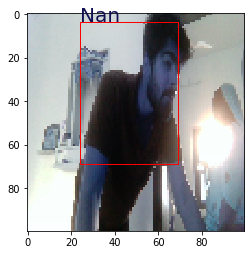

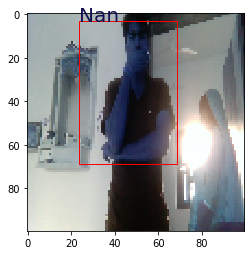

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
path='D:\\covid-19 mask detection\\mask1\\'
for i in os.listdir(path):
    fig,ax = plt.subplots(1)
    new_path=path+i
    img=cv2.imread(new_path)
    im=cv2.imread(new_path)
    im=cv2.resize(im,(100,100))
    img=cv2.resize(img,(100,100))
    img=img.reshape(-1,100,100,3)
    p=model.predict(img)
    x=p[0][0]*100
    y=p[0][1]*100
    w=p[0][2]*100
    h=p[0][3]*100
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, 'Nan',color='#100f4f',fontsize=20)
    ax.imshow(im) 
    